In [1]:
import os
import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
result_path = "Results/2021.09.24/All_100_3000B_20200601_to_20210918, AUC=0.723, Pr=0.516/test_detailed_result.csv"
# result_path = "Results/2021.09.09/All_20200601_to_20210901, AUC=0.7, Pr=0.631/test_detailed_result.csv"

res = pd.read_csv(result_path, parse_dates=['Date'])

N = 1
top_n_perc_threshold = np.percentile(res['y_pred'], 100 - N)
print("top_n_perc_threshold:", top_n_perc_threshold)
res['pred_labels'] = (res['y_pred'] >= top_n_perc_threshold).astype(int)

res['Month'] = res['Date'].dt.to_period('M')
res['Week'] = res['Date'].dt.to_period('W')

res['TP'] = res['y_true'] & res['pred_labels'] 
res['FP'] = ~res['y_true'] & res['pred_labels'] 

res.drop(['open', 'high', 'low'], axis=1, inplace=True)
res.head(3) # sort_values(by='y_pred', ascending=False).head(20)

top_n_perc_threshold: 0.5089363264999999


,Ticker,Date,close,volume,Max_increase,Max_decrease,y_true,y_pred,fold,pred_labels,Month,Week,TP,FP
0,AAPL,2021-07-14,149.149994,127050800.0,0.569900,-0.985586,0,0.206471,1.0,0,2021-07,2021-07-12/2021-07-18,0,0
1,AAPL,2021-07-15,148.479996,106820300.0,0.909217,-4.586475,0,0.177756,1.0,0,2021-07,2021-07-12/2021-07-18,0,0
2,AAPL,2021-07-16,146.389999,93251400.0,2.349889,-3.224265,0,0.140330,1.0,0,2021-07,2021-07-12/2021-07-18,0,0


In [13]:
res['y_true'].sum()

322

#### Histogram of y_prediction

array([[<AxesSubplot:title={'center':'y_pred'}>]], dtype=object)

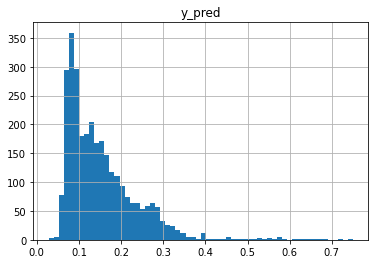

In [5]:
res[['y_pred']].hist(bins=60)

In [50]:
res.sort_values(by='y_pred', ascending=False).head(40)

,Ticker,Date,close,volume,Max_increase,Max_decrease,y_true,y_pred,fold,pred_labels,Month,Week,TP,FP
434,BA,2021-07-19,206.990005,24123600.0,14.735011,-1.058023,1,0.749966,1.0,1,2021-07,2021-07-19/2021-07-25,1,0
1100,GE,2021-07-19,96.000000,12362150.0,12.333330,-1.500003,1,0.721669,1.0,1,2021-07,2021-07-19/2021-07-25,1,0
458,BA,2021-08-20,212.669998,9324800.0,5.252268,-0.813465,0,0.686573,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
582,C,2021-07-19,65.080002,33318600.0,6.914566,-1.106333,0,0.684392,1.0,1,2021-07,2021-07-19/2021-07-25,0,1
642,CAT,2021-08-19,204.449997,4788100.0,5.502568,-0.606500,0,0.672377,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
2709,TSLA,2021-08-17,665.710022,23721300.0,11.213586,-2.534136,1,0.672307,1.0,1,2021-08,2021-08-16/2021-08-22,1,0
1123,GE,2021-08-19,99.419998,10805700.0,7.081071,-0.824783,1,0.654525,1.0,1,2021-08,2021-08-16/2021-08-22,1,0
397,AXP,2021-07-19,162.809998,6739800.0,10.355630,-0.816904,1,0.653839,1.0,1,2021-07,2021-07-19/2021-07-25,1,0
2990,XOM,2021-08-19,52.730000,30923500.0,6.846199,-1.194768,0,0.644397,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
235,AMD,2021-08-19,103.699997,71117500.0,10.405016,-1.658625,1,0.641831,1.0,1,2021-08,2021-08-16/2021-08-22,1,0


In [35]:
res.groupby('Month')['pred_labels'].sum()

Month
2021-07    14
2021-08    13
2021-09     4
Freq: M, Name: pred_labels, dtype: int32

In [36]:
res.groupby('Week')['pred_labels'].sum()

Week
2021-07-12/2021-07-18     0
2021-07-19/2021-07-25    13
2021-07-26/2021-08-01     1
2021-08-02/2021-08-08     0
2021-08-09/2021-08-15     0
2021-08-16/2021-08-22    13
2021-08-23/2021-08-29     0
2021-08-30/2021-09-05     2
2021-09-06/2021-09-12     2
2021-09-13/2021-09-19     0
Freq: W-SUN, Name: pred_labels, dtype: int32

In [37]:
res[res['FP']==1].sort_values(by='y_pred', ascending=False)#.head(20)

,Ticker,Date,close,volume,Max_increase,Max_decrease,y_true,y_pred,fold,pred_labels,Month,Week,TP,FP
458,BA,2021-08-20,212.669998,9324800.0,5.252268,-0.813465,0,0.686573,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
582,C,2021-07-19,65.080002,33318600.0,6.914566,-1.106333,0,0.684392,1.0,1,2021-07,2021-07-19/2021-07-25,0,1
642,CAT,2021-08-19,204.449997,4788100.0,5.502568,-0.606500,0,0.672377,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
2990,XOM,2021-08-19,52.730000,30923500.0,6.846199,-1.194768,0,0.644397,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
1320,INTC,2021-07-27,53.180000,39878000.0,2.425726,-1.635951,0,0.635526,1.0,1,2021-07,2021-07-26/2021-08-01,0,1
471,BAC,2021-07-19,36.930000,83251500.0,5.551040,-1.137292,0,0.629273,1.0,1,2021-07,2021-07-19/2021-07-25,0,1
1435,JPM,2021-07-19,146.970001,22172900.0,5.089471,-0.857314,0,0.609669,1.0,1,2021-07,2021-07-19/2021-07-25,0,1
901,CVX,2021-08-19,94.290001,17423400.0,5.483082,-1.516598,0,0.576183,1.0,1,2021-08,2021-08-16/2021-08-22,0,1
619,CAT,2021-07-19,203.080002,5391100.0,5.628320,-1.895808,0,0.553543,1.0,1,2021-07,2021-07-19/2021-07-25,0,1
1553,LMT,2021-08-20,357.170013,904300.0,2.004640,-1.007925,0,0.549420,1.0,1,2021-08,2021-08-16/2021-08-22,0,1


In [7]:
tickers = res['Ticker'].unique() # value_counts()
print(len(tickers))
tickers[:]

87


array(['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'AMT',
       'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BLK', 'BMY', 'C', 'CAT',
       'CHTR', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DE', 'DHR',
       'DIS', 'EL', 'FB', 'GE', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM',
       'INTC', 'INTU', 'ISRG', 'JNJ', 'JPM', 'KO', 'LLY', 'LMT', 'LOW',
       'MA', 'MCD', 'MDT', 'MMM', 'MRK', 'MRNA', 'MS', 'MSFT', 'NEE',
       'NFLX', 'NKE', 'NOW', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM',
       'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SE', 'SNAP', 'SPGI', 'SQ',
       'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'V',
       'VZ', 'WFC', 'WMT', 'XOM', 'ZM'], dtype=object)

In [8]:
t = np.array(['AAPL', 'ABBV', 'ABT', 'ADBE', 'AMAT', 'AMD', 'AMGN', 'AMT',
       'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BLK', 'BMY', 'C', 'CAT',
       'CHTR', 'CMCSA', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DE', 'DHR',
       'DIS', 'EL', 'FB', 'GE', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM',
       'INTC', 'INTU', 'ISRG', 'JNJ', 'JPM', 'LLY', 'LMT', 'LOW', 'MA',
       'MCD', 'MDT', 'MMM', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NOW',
       'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PM', 'PYPL', 'QCOM', 'RTX',
       'SBUX', 'SCHW', 'SE', 'SNAP', 'SPGI', 'SQ', 'T', 'TGT', 'TMO',
       'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'V', 'VZ', 'WFC',
       'WMT', 'XOM'])
set(tickers) - set(t)

{'KO', 'MRK', 'MRNA', 'ZM'}

In [12]:
res.groupby('Ticker').count().sum()

Date            3020
close           3020
volume          3020
Max_increase    3020
Max_decrease    3020
y_true          3020
y_pred          3020
fold            3020
pred_labels     3020
Month           3020
Week            3020
TP              3020
FP              3020
dtype: int64

In [48]:
a, b = os.path.split(result_path)
images_save_folder = os.path.join(a, b[:-4])
if not os.path.exists(images_save_folder):
    os.mkdir(images_save_folder)
images_save_folder

'Results/2021.09.24/All_100_3000B_20200601_to_20210918, AUC=0.723, Pr=0.516\\test_detailed_result'

1/87	3
2/87	0
3/87	0
4/87	0
5/87	0


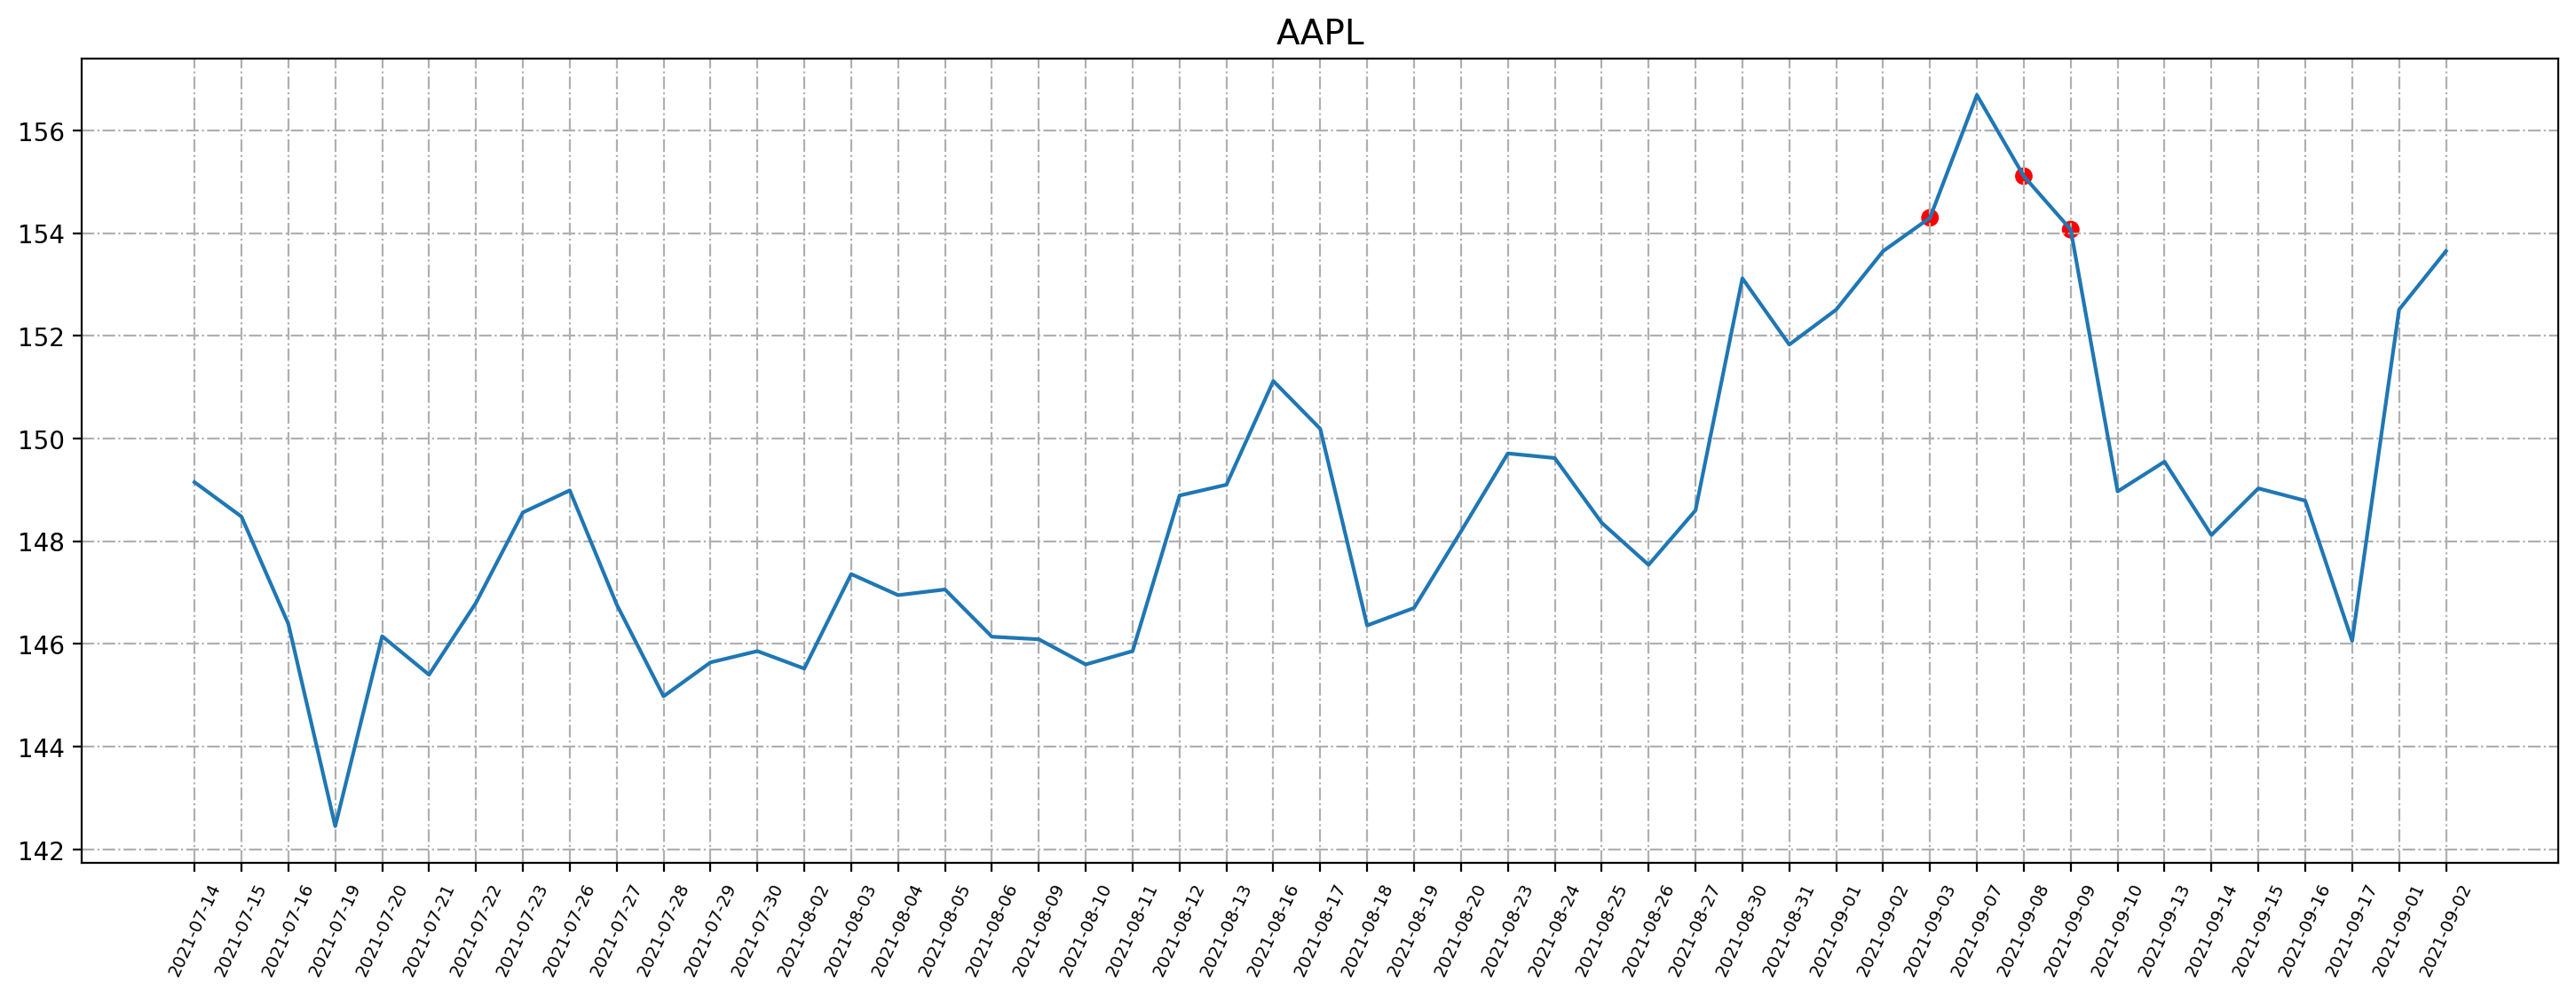

In [51]:
for i, ticker in enumerate(tickers[:5]):
    print(f"{(i+1)}/{len(tickers)}", end='\t')
    data = res[res['Ticker'] == ticker].reset_index()
    data['index'] = range(len(data))
    
    
    buy_signals = data[data['pred_labels'] == 1]#.reset_index()
    print(len(buy_signals))
    if len(buy_signals) > 0:
        fig, ax = plt.subplots(figsize=(18, 6), dpi=200)
        data['close'].plot(kind='line')
        tick_space = 1
        ax.set_xticks(range(0, len(data), tick_space))
        ax.set_xticklabels(data['Date'].dt.strftime('%Y-%m-%d')[::tick_space], rotation=65, fontsize=7)
        ax.grid(which='both', axis='both', linestyle='-.')
        ax.set_title(ticker, fontsize=14)
        color_map = {1: 'g', 0: 'r'}
        colors =  buy_signals['TP'].map(color_map)
        ax.scatter(x=buy_signals['index'], y=buy_signals['close'], c=colors, s=buy_signals['y_pred'] * 70)
#     fig.savefig(f'{images_save_folder}/{ticker}_{len(buy_signals)}BuySignal_Top{N}%.jpg')
#         plt.close()
    # buy_signal.plot(kind='scatter', ax=ax, x='index', y='close',c='g', s='y_pred')